<a href="https://colab.research.google.com/github/Lalo1005/eduardo-git/blob/master/Cap%C3%ADtulo_6_Python_Machine_Learning_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python - Machine Learning - Regresión Lineal**

**¿Qué es la regresión lineal?**

La regresión lineal es una técnica de análisis de datos que predice el valor de datos desconocidos mediante el uso de otro valor de datos relacionado y conocido. Modela matemáticamente la variable desconocida o dependiente y la variable conocida o independiente como una ecuación lineal. Por ejemplo, supongamos que tiene datos sobre sus gastos e ingresos del año pasado. Las técnicas de regresión lineal analizan estos datos y determinan que tus gastos son la mitad de tus ingresos. Luego calculan un gasto futuro desconocido al reducir a la mitad un ingreso conocido futuro.

## Instalando el ambiente

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
print(pd.__version__)

1.5.3


In [5]:
pd.__version__

'1.5.3'

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import matplotlib as mpl

In [9]:
print(mpl.__version__)

3.7.1


In [10]:
print(np.__version__)

1.23.5


In [11]:
np.__version__

'1.23.5'

## Aula 1 - Modelo de Regresión

### 1.1 Cargando los datos


[JSON Viewer](http://jsonviewer.stack.hu)

[Pandas: read_json](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html?highlight=read_json#pandas.read_json)

In [12]:
import pandas as pd
import numpy as np

* Un archivo json está formado por estructuras dentro de estructuras.

In [13]:
datos = pd.read_json(
    path_or_buf='/content/drive/MyDrive/ElProfeAlejo/C6.Python ML Regresión Lineal/data/inmuebles.json',
    orient='columns'
)
datos

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
...,...,...
73610,"{'customerID': '134148-MJIBCMDQ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73611,"{'customerID': '541465-QBQVXXXZ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73612,"{'customerID': '800542-BZREFTQS', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
73613,"{'customerID': '939419-ECGUNTIH', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."


### 1.2 Explorando las informaciones

* Análizamos los datos que conforman la columna ident para encontrar la información necesaria para ejecutar el análisis.

In [14]:
datos.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

* Análizamos los datos que conforman la columna listing para encontrar la información necesaria para ejecutar el análisis.

In [15]:
datos.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

### 1.3 Tratamiento de datos iniciales

#### Normalización

* El método normalize se utiliza en json cuando hay estructuras dentro de estructuras llevando todos los valores dentro de la estructura para afuera.
* Va a convertir toda la estructura json en una o varias columnas.

In [16]:
datos_lista1 = pd.json_normalize(datos.ident)
datos_lista1.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


* Debemos notar que la columna datos.listing tiene una o varias columnas dentro de otras columnas.
* Para normalizar todas las columnas agregamos el separado '_' que va a unir las subcolumnas que se encuentran dentro de la columna identificando esas columnas con el nombre de la columna + el nombre propio de dicha columna.

* Por ejemplo la columna types esta formada por dos subcolumnas, que son unit y usage, entonces cuando se aplique el método normalize con el separador, la columnas se van a identificar con el nombre de la columna principal desdoblada en sus dos subcolumnas y quedan comor types_unit y types_usage.

In [17]:
datos_lista2 = pd.json_normalize(datos.listing, sep='_')
datos_lista2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


In [18]:
datos_lista2.shape

(73615, 19)

#### Juntando los dataframes

* Para unir los datos utilizamos el método concat.

In [19]:
datos_inmuebles = pd.concat([datos_lista1, datos_lista2], axis=1)
datos_inmuebles.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


In [20]:
datos_inmuebles.shape

(73615, 21)

In [21]:
datos_inmuebles.to_json('/content/drive/MyDrive/ElProfeAlejo/C6.Python ML Regresión Lineal/data/inmueblesv1.json', orient='records', force_ascii=False)

*
El código que proporcionaste parece ser una llamada a la función to_json de un objeto llamado datos_inmuebles. Esta función es comúnmente utilizada en bibliotecas como pandas en Python para convertir datos en formato JSON y guardarlos en un archivo.

* Aquí hay una descripción detallada de los parámetros utilizados en tu código:

  datos_inmuebles: Este es el objeto que contiene los datos que se quieren convertir a formato JSON. Puede ser un DataFrame de pandas u otro tipo de estructura de datos compatible.

  .to_json('/content/drive/MyDrive/ElProfeAlejo/C6.Python ML Regresión Lineal/data/inmueblesv1.json': Este es el primer argumento de la función y especifica la ubicación y el nombre del archivo en el que se guardará el JSON. En este caso, el archivo se guardará en la ruta '/content/drive/MyDrive/ElProfeAlejo/C6.Python ML Regresión Lineal/data/inmueblesv1.json'.

  orient='records': Este es un parámetro opcional que especifica el formato de orientación del JSON. En este caso, se está utilizando 'records', que es una forma común de estructurar datos tabulares en JSON.

  force_ascii=False: Este es otro parámetro opcional que indica si se debe forzar la codificación ASCII en el archivo JSON. Al establecerlo en False, se permite la codificación de caracteres no ASCII en el archivo JSON.

* ***En resumen, este código toma los datos contenidos en datos_inmuebles (que   probablemente sea un DataFrame de pandas) y los guarda en un archivo JSON con el nombre y la ubicación especificados. La estructura del JSON seguirá el formato 'records', y se permitirá la codificación de caracteres no ASCII en el archivo.***

* Quiero analizar cada una de las columnas que es lo más importante y encontrar valores extraños.

In [22]:
datos_inmuebles.address_zone.value_counts()

Zona Oeste      37116
Zona Sul        19222
Zona Norte      15191
Zona Central     1921
                  165
Name: address_zone, dtype: int64

* Visualizamos que hay 165 inmuebles que no perteneces a una zona, esto puede generar problemas en el modelo de ML.

* Entonces para recorrer todas las columnas del DF utilizo for y el método value_counts()
* Con el comando print('========='*30) indico que separe los datos obtenidos de las columnas con == multiplicado por 30.

In [23]:
for columna in datos_inmuebles.columns:
    print('========='*30)
    print(datos_inmuebles[columna].value_counts())

775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: customerID, Length: 73615, dtype: int64
Website    73615
Name: source, dtype: int64
Apartamento    59106
Casa            9389
Outros          5120
Name: types_unit, dtype: int64
Residencial    69596
Comercial       4019
Name: types_usage, dtype: int64
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: address_city, dtype: int64
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: address_location_lon, Length: 25753, dtype: int64
-23.000371    399
-23.017479    278
-22.937463    236
-2

* Aquí hay una explicación línea por línea:

* for columna in datos_inmuebles.columns:: Esto inicia un bucle for que recorre cada columna en el DataFrame datos_inmuebles. datos_inmuebles.columns devuelve una lista de nombres de columnas en el DataFrame.

* print('========='*30): Esto imprime una línea de igual ("=") que se extiende a lo largo de 30 veces. El resultado es una línea de guiones igualmente distribuidos para separar visualmente las salidas de las diferentes columnas.

* print(datos_inmuebles[columna].value_counts()): Aquí, datos_inmuebles[columna] selecciona la columna actual en la iteración del bucle, y value_counts() cuenta la frecuencia de cada valor único en esa columna. La función value_counts() devuelve una Serie de pandas con los valores únicos como índices y las frecuencias como valores.

* ***En resumen, este código itera a través de todas las columnas en el DataFrame datos_inmuebles, imprime una línea divisoria y luego imprime la cuenta de valores únicos para cada columna. Es útil para obtener una visión rápida de la distribución de valores en cada columna de un DataFrame.***

### 1.4 Limpieza

#### Filtro

* Residencial    69596
* Comercial       4019
* Name: types_usage, dtype: int64

 * Con este filtro definimos mejor la solicitud de nuestro cliente al utilizar solo los inmuebles residenciales ubicados en Río de Janeiro, con lo cual disminuimos los registros.

  Nota.- Esto debido a que la gran mayoría de inmuebles residenciales se encuentra en Río de Janeiro.

* Rio de Janeiro        73607
* Queimados                 3
* São Gonçalo               2
* Cachoeirinha              1
* São João de Meriti        1
* Armação dos Búzios        1
* Name: address_city, dtype: int64

In [24]:
filtro = (datos_inmuebles['types_usage'] == 'Residencial') & (datos_inmuebles['address_city'] ==  'Rio de Janeiro')

#Aplicando el filtro
datos_inmuebles = datos_inmuebles[filtro]
datos_inmuebles.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


In [25]:
datos_inmuebles.shape

(69588, 21)

#### Tipos de variables

In [26]:
#Mucha atención al tipo de variables y al índice
datos_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

* **Análisis de la información proporcionada por el método .info().**
1. Los índices no están en forma secuencial.
2. Existen 4 columnas con valores nulos (address_location_lon, address_location_lat, prices_tax_iptu, prices_tax_condo).
3. Hay 5 columnas (precios y áreas) que están registradas como dtypo = objeto y en realidad deben ser valores numéricos (prices_price, prices_tax_iptu, prices_tax_condo, features_usableAreas, features_totalAreas).

Area del terreno vs Area construida

* Verificando la salida de `.info()`

> 69588 entries, 0 to 73614

 Observamos que tenemos que resetear el index, para que los registros de las infos estén ordenadas correctamente.

 Tenemos de 0 a 73,614 registros, esto se debe que al crear el DF inmuebles no se resetearon los índices y pese a ser eliminados 4,026 registros, se mantuvieron con la cantidad de índices de los registros originales, para eso reseteamos los índices y ya nos da los registros que deben ser de 0 a 69587.


In [27]:
datos_inmuebles.reset_index(drop=True, inplace=True)

In [28]:
datos_inmuebles.head(5)

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
4,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


In [29]:
datos_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

* Parámetro verbose=False

In [30]:
#mostrar el RangeIndex
#mostrar el rango de los índices no las columnas, muestra solo la parte del total de índices con el parámetro verbose=False
datos_inmuebles.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


Ahora están correctos la cantidad de registros con la cantidad de índices.

 ***Ahora corregimos el dtype de las columnas precios y áreas:***

 * Utilizando el método .astype (texto:int/float) para convertir un texto a un entero/entero con decimales.

 * Pero para no digitar 5 veces al método .astype (dentro de sus paréntesis se crea un diccionario que cambia el texto por un número entero/entero con decimales).

In [31]:
datos_inmuebles = datos_inmuebles.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64',
})

datos_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

### 1.5 - Tratamiento de datos finales

#### Trabajando los nulos

#### Datos nulos zone

In [32]:
datos_inmuebles.address_zone.value_counts()

Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: address_zone, dtype: int64

* Siempre que tenemos un problema hay buscar en los datos una solución.
* Tal vez si yo tengo el barrio y la zona no esta llena por el nombre del barrio puedo deducir la zona que falta en ese registro, porque las zonas tienen una estrecha relación con los barrios. Y si tengo el barrio puedo obtener la zona. Sola hay que saber si la columna barrio está completa sin nulos.(Sí, está completa).

1. Entonces primero para ubicar estos valores en blanco lo convertimos en nulos.
* Busca en datos_inmuebles['address_zone'] y reemplaza los valores en blanco por un valor nulo NaN .replace (' ', np.nan) y nuevamente guardalos en datos_inmuebles['address_zone']

* Claro, con gusto te explico este código en Python. Este código parece estar utilizando la biblioteca pandas junto con numpy para manipulación y análisis de datos. La línea que proporcionaste se encarga de reemplazar valores vacíos (cadenas vacías) en una columna específica de un DataFrame con valores NaN (Not a Number).

* Aquí hay una explicación paso a paso:

  datos_inmuebles['address_zone']: Esto selecciona la columna llamada 'address_zone' en el DataFrame datos_inmuebles. Un DataFrame es una estructura de datos tabular en pandas.

  .replace('', np.nan): Utiliza el método replace de pandas para reemplazar todos los valores vacíos (cadenas vacías representadas por '') en la columna 'address_zone' con el valor NaN de NumPy (np.nan).

  '' es la cadena vacía que se está reemplazando.
  np.nan es una constante de NumPy que representa un valor NaN, que es utilizado comúnmente para indicar datos faltantes o no disponibles.
  


  * **En resumen, esta línea de código está tratando de limpiar la columna 'address_zone' del DataFrame datos_inmuebles al reemplazar todas las cadenas vacías en esa columna con valores NaN.**
  
  * **Esto puede ser útil para manejar datos faltantes o nulos en el conjunto de datos, lo que facilita su posterior análisis y procesamiento.**

In [33]:
datos_inmuebles['address_zone'] = datos_inmuebles['address_zone'].replace('', np.nan)

* Comprobando la existencia de los valores nulos que reemplazaron a los registros vacios.
* El método isnull pregunta este registro es nulo si la respuesta es sí también los sumas, y así nos da el total de nulos de la columna address_zone

In [34]:
#verificación
datos_inmuebles.address_zone.isnull().sum()

149

In [35]:
datos_inmuebles.address_zone.value_counts()

Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
Name: address_zone, dtype: int64

Vamos a generar una columna entre address_zone y address_neighborhood

In [36]:
#relación zona con barrio
datos_inmuebles.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,...,150.0,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,...,120.0,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,...,100.0,0,0,0,0,132,132,0,0,0
3,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000.0,...,400.0,3,2,1,1,60,0,3,4,2
4,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000.0,...,0.0,0,0,0,0,200,200,0,0,0


* Está parte del código me devuelve todos los datos no nulos, ya que al listar todos los datos nulos al indicar la virgulilla le digo en realidad que liste solo los datos no nulos en address_zone-
  [~datos_inmuebles['address_zone'].isna()]

* Una vez que tenemos los valores no nulos utilizo otro filtro(método) quiero que elimine los registros duplicados de la columna address_neighborhood vamos a tener una relación 1 a 1, una zona un barrio (es decir le digo que me muestre la cantidad de datos únicos que forman estas columnas)
  .drop_duplicates(subset=['address_neighborhood'])

* Y a este resultado lo voy a convertir en un diccionario, al crear el diccionario voy a poder establecer la relación de igualdad entre la zona y el barrio.
  .to_dict('records')

In [37]:
dici = datos_inmuebles[~datos_inmuebles['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')
print(dici)

[{'customerID': '775564-BOJSMVON', 'source': 'Website', 'types_unit': 'Outros', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.413557, 'address_location_lat': -22.909429, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Taquara', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 150.0, 'features_bedrooms': 0, 'features_bathrooms': 0, 'features_suites': 0, 'features_parkingSpaces': 1, 'features_usableAreas': 62, 'features_totalAreas': 62, 'features_floors': 0, 'features_unitsOnTheFloor': 0, 'features_unitFloor': 0}, {'customerID': '660895-AUENKNYY', 'source': 'Website', 'types_unit': 'Apartamento', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.509141, 'address_location_lat': -22.869698, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Santíssimo', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 120.0, 'features_bedrooms': 2, 'features_bathrooms':

* Ahora tenemos una valor 1 a 1 un registro tiene una llave y un valor

  'address_zone': 'Zona Oeste', 'address_neighborhood': 'Guaratiba'

* Ahora me quedo solo con las columnas que quiero buscar, que son barrio y zona.

In [38]:
#Ahora creo un diccionario de barrio con la zona a la que pertenece.
dic_zonas = {dic['address_neighborhood']: dic['address_zone'] for dic in dici}
print(dic_zonas)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

* Voy a cruzar todo el DF datos_inmuebles con diccionario dic_zonas;

* Por lo que el for itere/recorra primero el barrio luego la zona en el diccionario y cruce/asigne los resultados localizados en el DF columna address_neighborhood == barrio y address_zone = zona luego de ese cruce barrio zona lo obtenido lo guarde en la variable zona. O sea va a llenar nuevamente los datos de address_zone con los del diccionario y así se eliminan los nulos

In [39]:
for barrio,zona in dic_zonas.items():
  datos_inmuebles.loc[datos_inmuebles['address_neighborhood'] == barrio, 'address_zone'] = zona

* Contando cuantos nulos tengo de address_zone en mi DF (Tengo cero)

In [40]:
datos_inmuebles['address_zone'].isnull().sum()

0

In [41]:
datos_inmuebles.address_zone.value_counts()

Zona Oeste      35522
Zona Sul        18453
Zona Norte      14602
Zona Central     1011
Name: address_zone, dtype: int64

#### Datos nulos prices

In [42]:
datos_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

In [43]:
datos_inmuebles.prices_tax_iptu.isnull().sum()

8725

In [44]:
datos_inmuebles.prices_tax_condo.isnull().sum()

6061

* Llenar los valores NaN con 0 y graba directamente en la columna del DF directamente con el método .fillna( ).

In [45]:
datos_inmuebles.prices_tax_iptu.fillna(0, inplace=True)
datos_inmuebles.prices_tax_condo.fillna(0, inplace=True)

In [46]:
print(f"Total de prices nulos: {datos_inmuebles.prices_tax_iptu.isnull().sum()}")
print(f"Total de prices_tax_condo nulos: {datos_inmuebles.prices_tax_condo.isnull().sum()}")

Total de prices nulos: 0
Total de prices_tax_condo nulos: 0


#### Modificar el nombre de las columnas y la selección de variables

* Eliminando columnas no interesantes.

In [47]:
datos_inmuebles.drop(['customerID', 'source', 'types_usage', 'address_city',
                    'address_location_lon', 'address_location_lat','address_neighborhood' ], axis = 1, inplace=True)

* Renombrando los nombres de la columnas del DF para que sea más fácil de comprender.
1. Primero creo el diccionario de las columnas que voy a renombrar
2. Con el método .rename() renombramos las columnas.

In [48]:
diccionario_columnas = {'types_unit': 'unit', 'address_zone': 'zone', 'prices_price': 'price',
                     'prices_tax_condo': 'tax_condo', 'prices_tax_iptu': 'tax_iptu', 'features_bedrooms': 'bedrooms',
                      'features_bathrooms': 'bathrooms', 'features_suites': 'suites', 'features_parkingSpaces': 'parkingSpaces',
                      'features_usableAreas': 'usableAreas', 'features_totalAreas':'totalAreas', 'features_floors':'floors',
                      'features_unitsOnTheFloor':'unitsOnTheFloor', 'features_unitFloor':'unitFloor'}

datos_inmuebles = datos_inmuebles.rename(diccionario_columnas, axis = 1)
datos_inmuebles.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


In [49]:
datos_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unit             69588 non-null  object 
 1   zone             69588 non-null  object 
 2   price            69588 non-null  float64
 3   tax_iptu         69588 non-null  float64
 4   tax_condo        69588 non-null  float64
 5   bedrooms         69588 non-null  int64  
 6   bathrooms        69588 non-null  int64  
 7   suites           69588 non-null  int64  
 8   parkingSpaces    69588 non-null  int64  
 9   usableAreas      69588 non-null  int64  
 10  totalAreas       69588 non-null  int64  
 11  floors           69588 non-null  int64  
 12  unitsOnTheFloor  69588 non-null  int64  
 13  unitFloor        69588 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 7.4+ MB


In [50]:
datos_inmuebles.shape

(69588, 14)

## Aula 2 - Regresión Lineal

1. **La regresión lineal es una técnica de análisis de datos que predice el valor de datos desconocidos mediante el uso de otro valor de datos relacionado y conocido.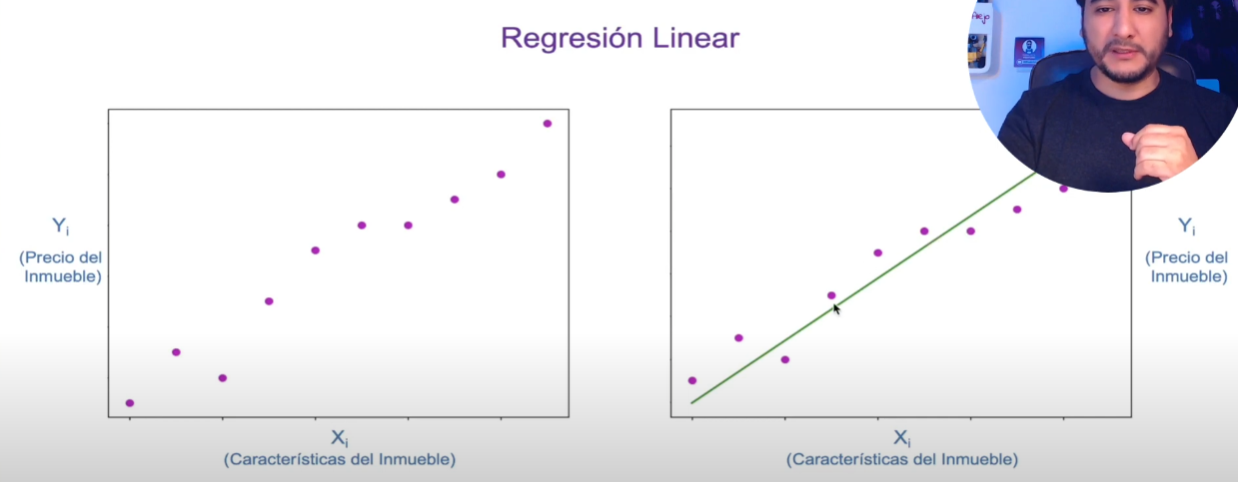**
2. Modela matemáticamente la variable desconocida o dependiente y la variable conocida o independiente como una ecuación lineal.
3. Por ejemplo, supongamos que tiene datos sobre sus gastos e ingresos del año pasado.
* Las técnicas de regresión lineal analizan estos datos y determinan que tus gastos son la mitad de tus ingresos.
* Luego calculan un gasto futuro desconocido al reducir a la mitad un ingreso conocido futuro.

### 2.1 - Correlación

* **La correlación es el primer análisis que efectuamos luego del tratamiento de datos.**

  **método .corr( )**

*   Correlación: grado de relación entre variables. Esta relación puede ser positiva o negativa.

*   Multicolinealidad: relación perfecta o exacta entre variables.

In [51]:
correlacion = datos_inmuebles.corr()
correlacion

<ipython-input-51-6cef349969fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = datos_inmuebles.corr()


,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedrooms,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


* Estos datos obtenidos ya se pueden interpretar pero para optimizar y visualizar los datos es mejor utilizar un gráfico.

In [52]:
#bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

Para más detalles consultar [Documentación Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* El código que proporcionaste se utiliza junto con la librería Seaborn en Python. Seaborn es una biblioteca de visualización de datos basada en Matplotlib que proporciona una interfaz de alto nivel para crear gráficos informativos y atractivos. En particular, ***sns.axes_style("white")*** se utiliza para establecer el estilo de los ejes de un gráfico.

* Aquí hay una explicación más detallada:

* sns: Es un alias comúnmente utilizado para referirse a la librería Seaborn.
* axes_style: Es una función de Seaborn que se utiliza para establecer el estilo de los ejes de un gráfico. Seaborn proporciona varios estilos predefinidos que pueden aplicarse a los gráficos para cambiar su apariencia.
* La llamada específica que proporcionaste, sns.axes_style("white"), establece el estilo de los ejes del gráfico como "white" (blanco). Este estilo generalmente se utiliza para fondos de gráficos claros o para gráficos que se integrarán en documentos o presentaciones con fondos claros.

* El contexto with sugiere que este estilo se aplicará temporalmente a los gráficos dentro de un bloque de código específico. En Seaborn, este enfoque se utiliza comúnmente con un gráfico específico o con la función sns.set_style() para establecer el estilo global de todos los gráficos en un script o un entorno particular.

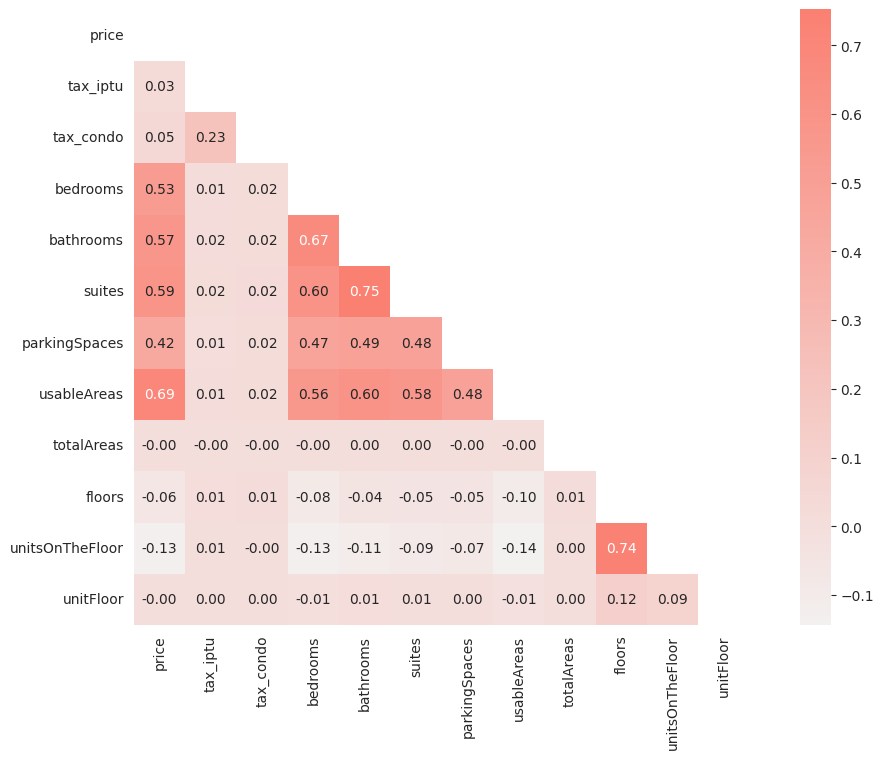

In [53]:
# Gráfico para la visualización de las correlaciones
# Generando el color de la visualización: salmón
cores = sns.color_palette('light:salmon', as_cmap=True)
# Generar una máscara para ver algunos puntos de la tabla.
mask = np.zeros_like(correlacion)
mask[np.triu_indices_from(mask)] = True
# Y con esto genero la figura o gráfico a visalizar heatmap.
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8)) # figura de 13 de ancho x 8 de altura
    ax = sns.heatmap(correlacion, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True) # heatmap(correlación, color del heatmap, mask para que presente solo algunos puntos,
    # square = que lo ponga en cuadrados, con dos decimales máximo y annotaion igual true para muestren los valores en cada cuadrado).

* Barra de intensidad de calor (heatmap - se ve al costado del gráfico) :
1. cuando es mayor es la intensidad mayor es la correlación que tienen las variables.
2. cuando es menor la intensidad menor es la correlación que tienen las variables.

Análisis de la distribución de la variable respuesta.

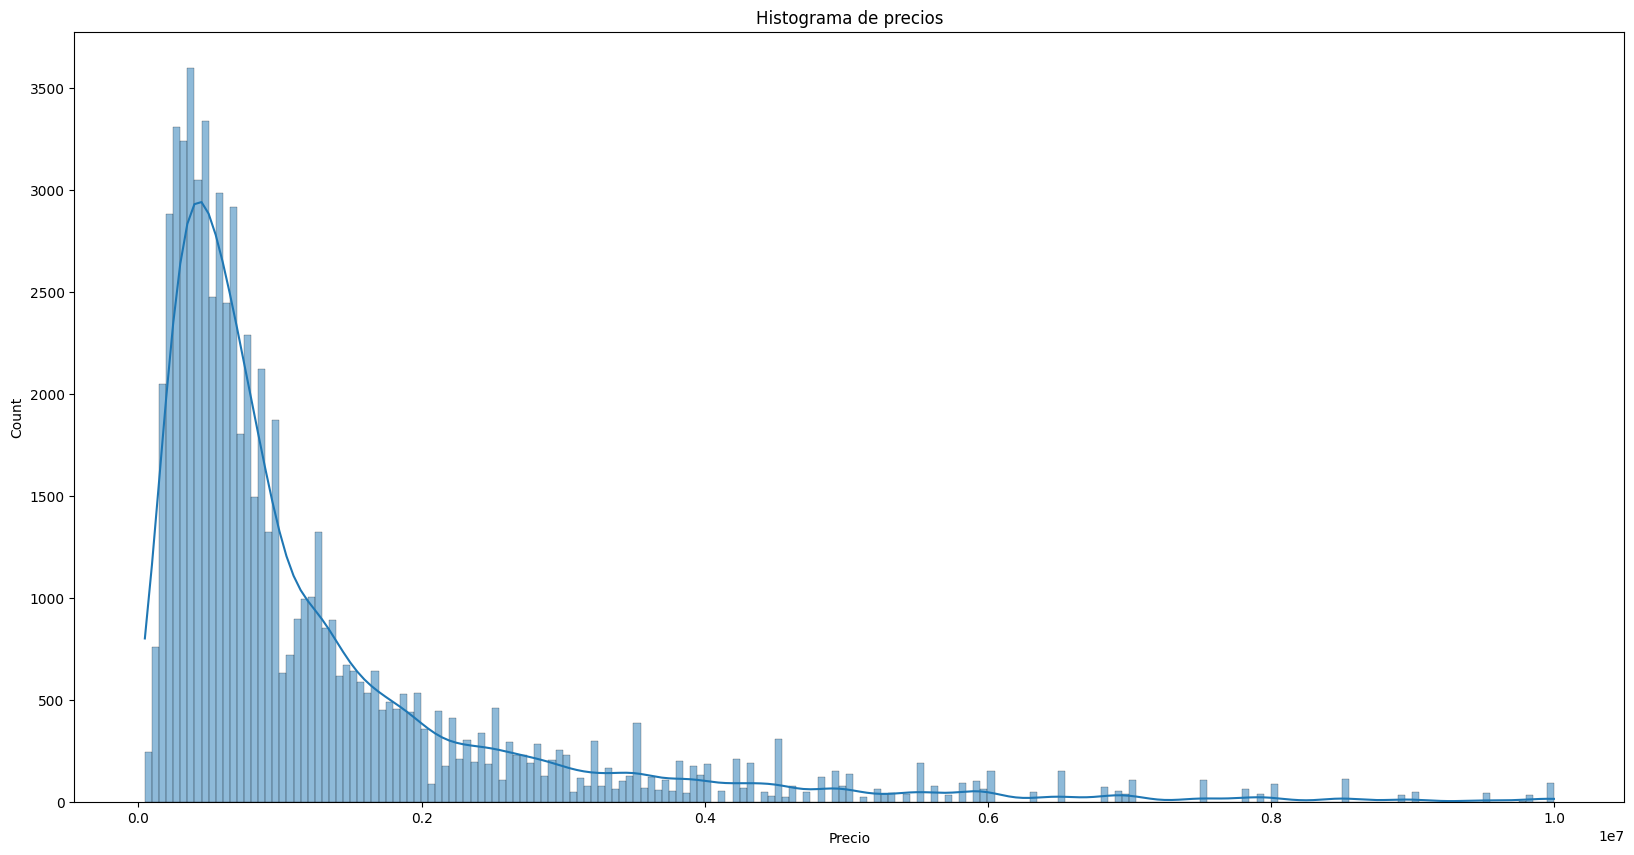

In [54]:
# Antes (distribución asimetrica a la derecha)
# gráfico de barras de los históricos de la columna precio que es la variable que voy a pronósticar
# quiero saber si esta bien dristribuida o no.
ax = sns.histplot(data=datos_inmuebles, x='price', kde=True)
ax.figure.set_size_inches(20, 10) # tamaño de la figura o lienzo
ax.set_title('Histograma de precios') # un título
ax.set_xlabel('Precio'); # un rótulo para el eje x

* Se visualiza que:
1. Cuando más cerca a 1 más alto el precio.
2. Cuando más lejos de 1 más bajo el precio.
3. El gráfico muestra que los datos son asimétricos.

* **Para trabajar con Machine Learning las bases de datos deben estar bien trabajados, es decir tener datos simétricos.**
* **Para generar modelos de regresión lineal lo que necesitamos es una distribución simétrica en nuestra variable dependiente precio.**
* **Por lo que hay que convertir está variable asimétrica en una simétrica**



#### Transformación de las variables

* **Primero trabajamos la variables numéricas para que tengan una distribución simétrica.**
* **Los valores numéricos asimétricos son transformados mediante logaritmos a valores logarítmicos y esos valores son simétricos.**

Estamos realizando una transformación logarítmica de las variables para obtener una distribución simétrica (más cercana a la normal), por lo que podemos usar el modelo de regresión lineal. La transformación realizada es:


$$log1p = log(1+x)$$


Recuerda realizar la transformación inversa para obtener el valor original:


$$expm1 = exp(x) - 1$$




* Para más detalles consultar las documentaciones [`log1p`](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html), [`expm1`](https://numpy.org/doc/stable/reference/generated/numpy.expm1.html#numpy.expm1) e [`FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer)



* **Tenemos una función en Python a través de la biblioteca sklearn.preprocessing llamada FunctionTransformer que convierte una distribución asimétrica en una distribución simétrica.**

* **Los valores numéricos son transformados a sus valores logarítmicos generando así una distribución simétrica.**

* **Nota.-Los números reales son transformados a logaritmos y para convertirlos nuevamente a numéros reales usamos la función exponencial.**

In [55]:
from sklearn.preprocessing import FunctionTransformer

# Transformo todos los números reales a logaritmos con la función:
# FunctionTransformer(np.log1p, validate=True)
transformer = FunctionTransformer(np.log1p, validate=True)
# Utilizando select_dtypes selecciono todas las columnas excluyendo la de tipo texto. Transform solo puede utilizarse para valores numéricos.
# .select_dtypes(exclude=['object'])
# A las variables numéricas le aplico transformer y lo guardo en datos_transformados.
datos_transformados = transformer.transform(datos_inmuebles.select_dtypes(exclude=['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [56]:
# Con este filtro traigo el nombre de las columnas esto porque al transformar los numéros se perdio el nombre de las columnas.
columnas_datos_tranformados = datos_inmuebles.select_dtypes(exclude=['object']).columns

# Aquí concateno/junto el DF datos_inmuebles entre los datos tipo texto y los datos transformados + los nombers de sus columnas.
df_transformado = pd.concat([datos_inmuebles.select_dtypes(include=['object']), pd.DataFrame(datos_transformados, columns=columnas_datos_tranformados)], axis=1)
# Ahora visulaizamos los valores numéricos transformados en valores logarítmicos. (Lo que me da una distribución simétrica)
df_transformado.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


<ipython-input-57-334f95bd7f4d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_transformada = df_transformado.corr()


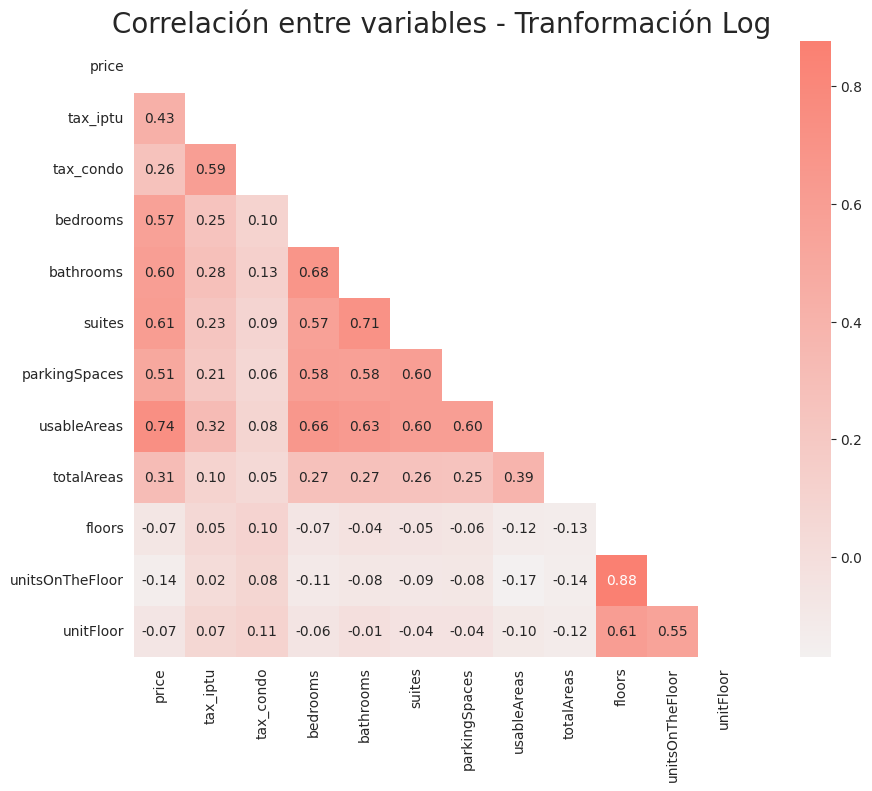

In [57]:
#despues de la transformación
correlacion_transformada = df_transformado.corr()
mask = np.zeros_like(correlacion_transformada)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacion_transformada, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlación entre variables - Tranformación Log', fontsize=20)

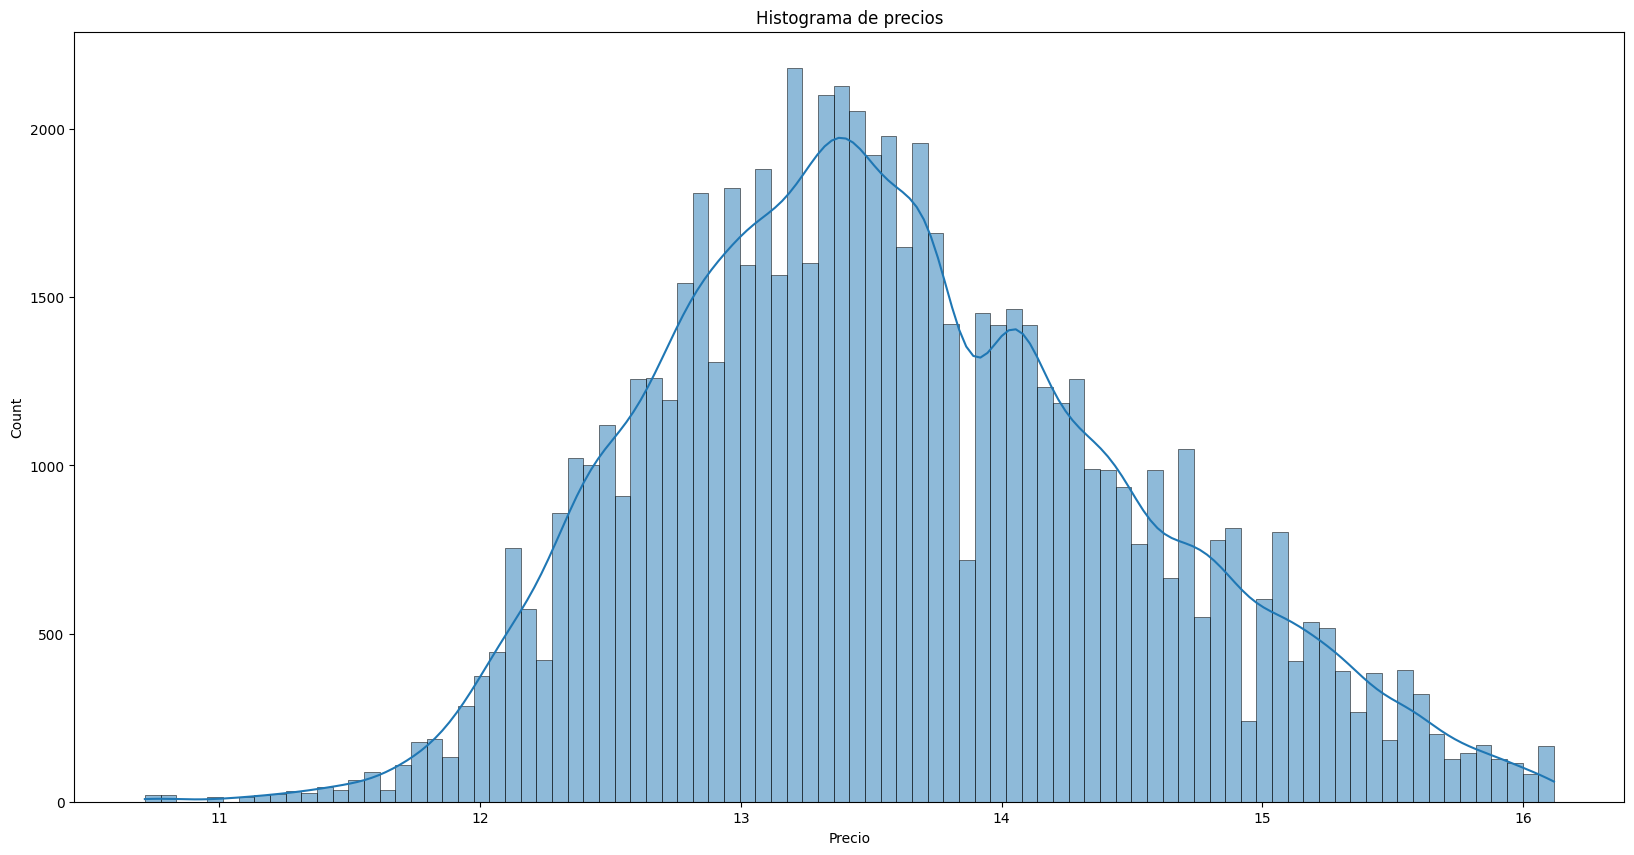

In [58]:
#después (distribución simétrica)
ax = sns.histplot(data=df_transformado, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de precios')
ax.set_xlabel('Precio');

* **Esto es una distribución simétrica en la cual la mayoría de los valores se encuentra proporcionalmente en la mitad de los valores.**
* **Ahora hay que transformar la variables categóricas (texto) en variables numéricas.**

#### Dummies

* Transformando las variables texto a variables numéricas.

In [59]:
# Selecciono las variables categóricas
variables_categoricas = df_transformado.select_dtypes(include=['object']).columns

In [60]:
variables_categoricas

Index(['unit', 'zone'], dtype='object')

* El método de pandas .get_dummies() transforma texto en números.

In [61]:
df_dummies = pd.get_dummies(df_transformado[variables_categoricas])
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0
2,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0


In [62]:
df_dummies.shape

(69588, 7)

In [63]:
# Juntame los datos del DF df_transformado menos las variables_categoricas con el DF df_dummies
datos_inmuebles_dummies = pd.concat([df_transformado.drop(variables_categoricas, axis=1), df_dummies], axis=1)
datos_inmuebles_dummies.head()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,1,0,0,0,0,1,0
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,0,0,1,0,0,1,0


In [64]:
datos_inmuebles_dummies.shape

(69588, 19)

### 2.2 - Regresión Lineal

* "El análisis de regresión se refiere al estudio de la dependencia de una variable, la variable dependiente, en relación con una o más variables, las variables explicativas, con el objetivo de estimar y/o predecir el valor medio (de la población) de la primera en términos de los valores conocidos o fijados (en muestreos repetidos) de estos últimos”.

* [Documentación Sklearn - LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

* Regresión simple: la variable dependiente (`y`) está relacionada con una única variable explicativa (`X`).

* Regresión múltiple: la variable dependiente (`y`) está relacionada con más de una única variable explicativa (`Xi`).

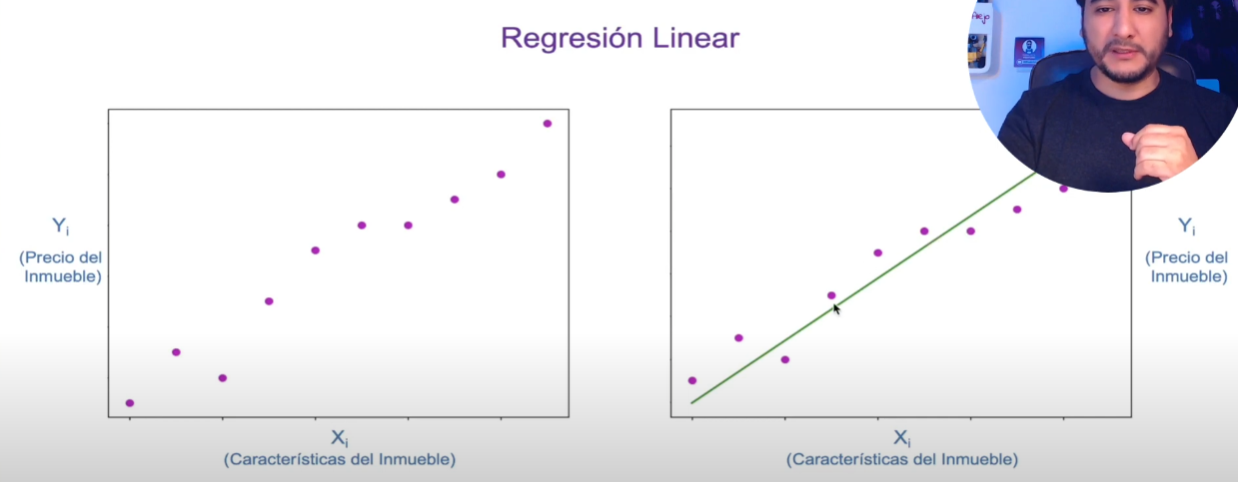

* La recta sería el valor pronósticado de nuestro modelo (variable y).

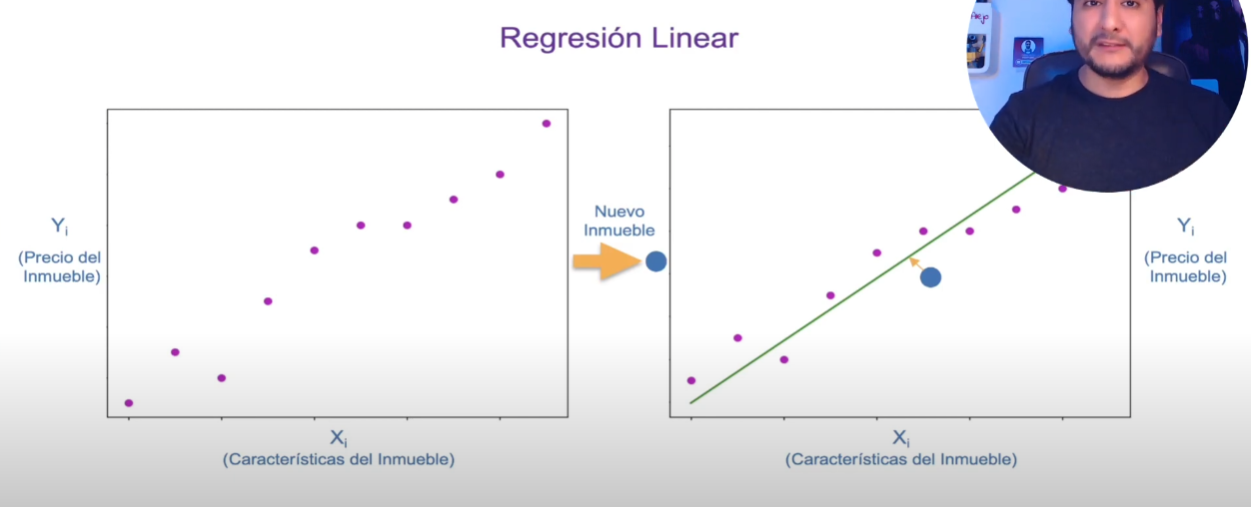

### 2.3 - Ajuste y Predicción

### División de los datos

* **Hay que dividir los datos que van en el modelo de ML:
1. En el eje X (variable o variables independientes) con los datos que van
2. En el eje y (variable dependiente) con el cual se va a pronósticar.

In [65]:
# variables independientes, nos referimos a la variable X
# Las variables x son todas las caracteríticas (columnas, campos, atributos)
# del DF menos lo que queremos pronosticar, en este caso, el precio.
X = datos_inmuebles_dummies.drop('price', axis=1)

#variable dependiente, nos referimos a la variable y
# Creamos un DF con solo la columna precio
y = datos_inmuebles_dummies['price']

In [66]:
X

,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
1,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0
2,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
3,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,1,0,0,0,0,1,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,7.972811,7.762596,1.791759,2.397895,0.693147,1.609438,6.932448,6.932448,0.000000,0.000000,0.000000,0,1,0,0,0,1,0
69584,9.615872,8.006701,1.791759,2.079442,1.791759,1.945910,6.621406,7.131699,0.000000,0.000000,0.000000,0,1,0,0,0,1,0
69585,0.000000,0.000000,1.609438,1.791759,1.609438,1.386294,5.796058,5.796058,0.000000,0.000000,0.000000,1,0,0,0,0,0,1
69586,10.463132,7.783641,1.791759,2.397895,1.791759,1.609438,6.932448,6.932448,0.000000,0.000000,1.386294,0,1,0,0,0,1,0


In [67]:
y

0        10.714440
1        10.714440
2        10.819798
3        10.819798
4        10.819798
           ...    
69583    16.118096
69584    16.118096
69585    16.118096
69586    16.118096
69587    16.118096
Name: price, Length: 69588, dtype: float64

* **Para entrenar el modelo de ML tenemos que separar los datos en datos de entrenamiento y los datos de prueba:**
1. Los datos de entrenamiento son los que voy a enseñar a la máquina para que aprenda.
2. Los datos de prueba no se lo voy a enseñar.
3. Una vez que la máquina/modelo ML ha aprendido con los datos de entrenamiento me va a generar una línea de pronósticos
4. Luego entonces voy a ingresar los datos de prueba para ver si realmente, si con los datos o dato, este se aleja o no se aleja de la línea que el modelo genero en el gráfico, de esta forma se miden el grado de exactidud (accuracy) del modelo de regresión lineal.
5. Para dividirlos utilizamos la utilidad/función **train_test_split** (divide datos en entrenamiento y prueba) importada de la biblioteca sklearn model_selection.

In [68]:
from sklearn.model_selection import train_test_split

* **Sklearn.model_selection.train_test_split**
* Divide matrix o matrices en subconjuntos de pruebas y series aleatorias.

* Utilidad rápida que incluye la validación de entrada, y la aplicación para ingresar datos en una sola llamada para dividir (y opcionalmente submuestrear) datos en una sola línea.next(ShuffleSplit().split(X, y))


In [69]:
# Dvisión en conjunto de datos de entrenamiento y datos de prueba
# 30% para probar y 70% para el entrenamiento
# La mayor cantidad para entrenar y la menor cantidad para probar si funciono o no el modelo
# Esto me genera dos variables de entrada y 4 de salida
# En y_test se encuentra guardado los valores reales de los datos pronosticados en X_text
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelo

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
#Inicializando el modelo lr (linearRegression) en blanco
lr = LinearRegression()

In [72]:
#Entrenamiento con el método fit 70% de los datos
lr.fit(X_train, y_train)

LinearRegression()

In [73]:
#Prueba con el método predict - Pronóstica los valores de esos inmuebles.
prediccion_lr = lr.predict(X_test)

In [74]:
#Resultados de la predicción
prediccion_lr

array([13.25768024, 12.45705313, 12.91487963, ..., 13.13161073,
       12.42379775, 14.49548233])

Estos precios obtenidos están en numéros logarítmicos esto es porque para trabajar el modelo necesitabamos que los datos fueran simétricos, ahora los vamos a convertir a valores.

Recuerda realizar la transformación inversa para obtener el valor original:


$$expm1 = exp(x) - 1$$

In [75]:
#transformación inversa
np.expm1(13.25768024)

572448.7513552749

## 2.4 - Métrica de desempeño

* Con estas métricas vamos a ver que también está encajado nuestro modelo.

### Coeficiente de Determinación

* averiguar qué tan “bien” se ajusta una línea de regresión muestral a los datos
* r2 se encuentra entre 0 y 1
* "r2 mide la proporción o porcentaje de la variación total de Y explicada por el modelo de regresión".





* Mide la diferencia de todos los puntos y reales con los y pronóticados del modelo, mide la diferencia o la distancia de todos los puntos en relación con la recta verde para ver en total cuanto se alejaron todos los puntos pronósticados del punto real.
* Calcula el promedio de estos alejamientos para mostrarnos un valor entre 0 y 1, cuanto más cerca de 0 el pronóstico es pésimo pero cuanto más cerca de 1 el pronóstico está muy bien.

In [76]:
#importar la biblioteca
from sklearn.metrics import r2_score

In [77]:
# valores reales se encuentran almacenados en y_test
# valores pronósticados se encuentran almacenados en prediccion_lr
r2_lr = r2_score(y_test, prediccion_lr)
r2_lr

0.7880682093407632

* El valor obtenido 0.788 está muy bien, todo valor obtenido por encima de 0.70 es un buena referencia de que el modelo funciona.
* Se puede mejorar claro que sí.

### Extra

* [Documentación Sklearn - Métricas para Regresión](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

* Nota: ¡Estas métricas dependen de la escala de los datos!

* MSE (Mean Squared Error o Error cuadrático medio): media de la diferencia **elevada al cuadrado** entre el valor real y el predicho. *(penalización por error)*

* MAE (Mean Absolute Error o Error absoluto medio): media de la diferencia **absoluta** (módulo) entre el valor real y el predicho.


# Aula 3 - Arbol de Decisión para Regresión
* Un árbol de decisión es un mapa de los posibles resultados de una serie de decisiones relacionadas. Permite que un individuo o una organización comparen posibles acciones entre sí según sus costos, probabilidades y beneficios. Se pueden usar para dirigir un intercambio de ideas informal o trazar un algoritmo que anticipe matemáticamente la mejor opción.
* Un árbol de decisión, por lo general, comienza con un único nodo y luego se ramifica en resultados posibles. Cada uno de esos resultados crea nodos adicionales, que se ramifican en otras posibilidades. Esto le da una forma similar a la de un árbol.
* Hay tres tipos diferentes de nodos: nodos de probabilidad, nodos de decisión y nodos terminales. Un nodo de probabilidad, representado con un círculo, muestra las probabilidades de ciertos resultados. Un nodo de decisión, representado con un cuadrado, muestra una decisión que se tomará, y un nodo terminal muestra el resultado definitivo de una ruta de decisión.






* Este modelo sirve tanto para regresión o clasificación.

## 3.1 - Implementando el Modelo


In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
#Inicializando el modelo: para inicializar el modelo debemos guardalo en una variable
# y colocarlo algunos parámetros random_state es una semilla para obtener los mismos resultados
# max_depth es la profundidad del árbol
dtr = DecisionTreeRegressor(random_state=42, max_depth=5)

In [80]:
#Entrenamiento
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [81]:
#Prueba
prediccion_dtr = dtr.predict(X_test)

In [82]:
#Resultados de la predicción
prediccion_dtr

array([13.55136531, 12.33741035, 13.24458243, ..., 13.23643158,
       12.33741035, 14.55274625])

**Gráfico de error de predicción**: un gráfico de error de predicción muestra los objetivos reales frente a los valores predichos. En un modelo perfecto, estos puntos estarían alineados a 45 grados.


Para obtener más información sobre otras vistas:
[**Documentación de YellowBrick**](https://www.scikit-yb.org/en/latest/)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


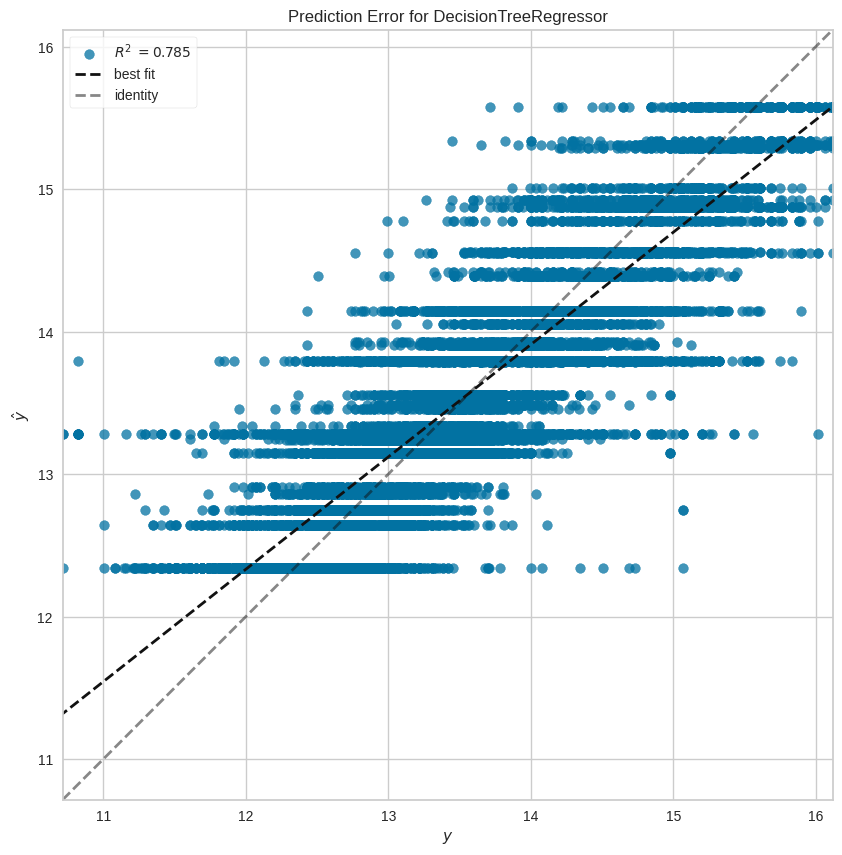

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [83]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(dtr)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

## 3.2 - Métrica

In [87]:
#coeficiente de determinación
r2_dtr = r2_score(y_test, prediccion_dtr).round(4)*100
r2_dtr

78.47

# Aula 4 - Random Forest para Regresión

* **Es un modelo de ensamble, es decir, es un conjunto de varios modelos trabajando en forma simultánea para obtener una mejor exactidud, por ejemplo, diversos grupos/lotes de árboles de decisión.**

* **Ejecuta nuestro modelo original (con muestras diferentes) en diferentes nodos principales, diferentes tomas de decisión en cada uno de ellos y diferentes resultados para cada uno de ellos, es decir es un random forest (bosque aleatorio), al utlizar los mismos datos intentan pronosticar el mismo resultado que es el precio y de este análisis se toma el precio promedio. Tenemos la oportunidad de seleccionar un mejor resultado más preciso para nuestro modelo de ML.**

  Nota.-
    
    Regresión: continuas - numéricas

    Clasificación: categóricas - texto


## 4.1 - Modelo Ensemble

[Biblioteca Sklearn - Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

## 4.2 - Predicción

**Observación**
Los parámetros son prácticamente los mismos entre `DecisionTreeRegressor()` y `RandomForestRegressor()`, con la excepción de:

* `n_estimators`: número de árboles en el bosque
* `bootstrap`: define si se utilizará el método de muestreo estadístico *bootstrap*
* `oob_score`: define si se utilizará el método de muestreo *out-of-bag* para medir los errores de predicción
* `n_jobs`: número de *jobs* que se ejecutan en paralelo (computación paralela - procesadores)
* `warm_start`: adecuación de un nuevo bosque o usa un bosque existente.
* `max_samples`: en caso de que `bootstrap` sea `True`, define el número de muestras que se extraerán de X para entrenar cada árbol base.

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
# Inicializando RandomForestRegressor
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [90]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [91]:
prediccion_rf = rf.predict(X_test)

**Gráfico de error de predicción**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


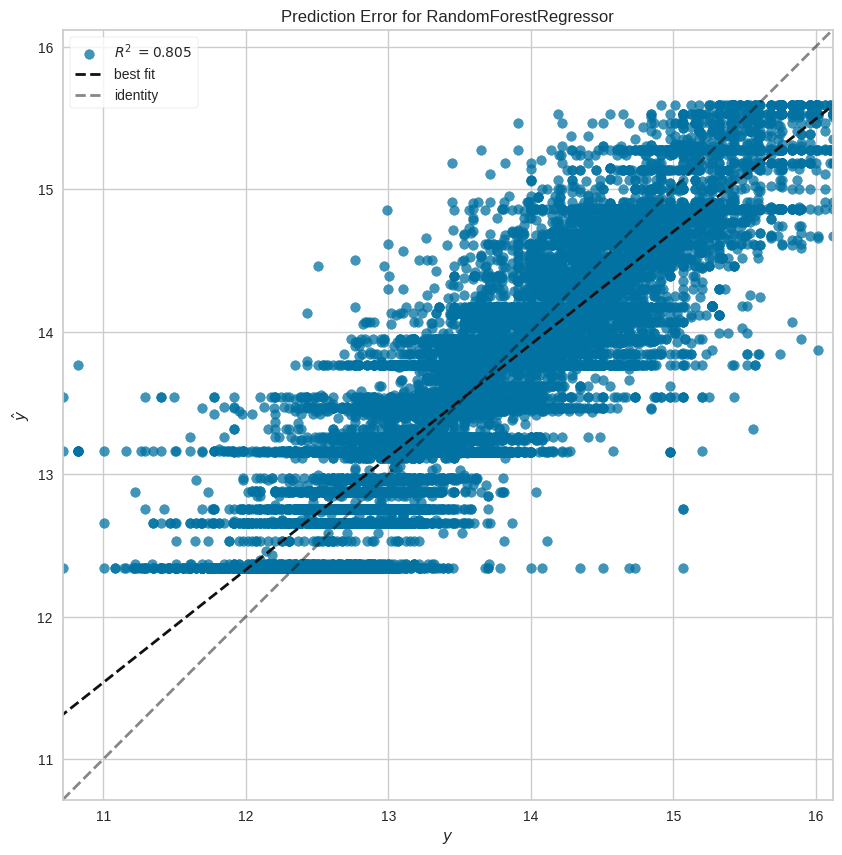

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [92]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(rf)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

## 4.3 - Métrica de desempeño

In [93]:
#coeficiente de determinación
r2_rf = r2_score(y_test, prediccion_rf)
r2_rf

0.805273364453047

Este resultado quiere decir que de 10 veces 8 va a acertar y 2 no.

# Aula 5 - Técnicas de Optimización


## 5.1 - Herramientas de Optimización

* ¿Por qué optimizar?

* ¿Qué herramientas tenemos?

* [Mejorando los hiperparámetros - Documentación Sklearn](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)

### 1. Cross Validation (Validación Cruzada)

* [Documentación Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

* **Cross Validation** es una técnica ampliamente utilizada para evaluar el rendimiento de los modelos y la consiguiente verificación de tendencias en el aprendizaje automático. Consiste en particionar los datos en subconjuntos (partes), donde un subconjunto se usa para entrenamiento y otro subconjunto se usa para probar y evaluar el rendimiento del modelo.

* ¡Los datos particionados son los datos de entrenamiento (70% de los datos originales)!

* **K-fold**: el conjunto de entrenamiento se divide aleatoriamente en K subconjuntos de aproximadamente el mismo tamaño, luego se realizan K iteraciones, donde los subconjuntos K-1 son para entrenamiento y 1 para validación.

* El rendimiento calculado por validación cruzada k-fold es el promedio de todos los valores calculados en cada iteración.

### 2. Randomized Parameter Optimization (Optimización Aleatoria de Parámetros)

* [Documentación Randomized Search](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)

* [Artículo científico sobre Random Search](https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)

* "Define un espacio de búsqueda como un dominio acotado de valores de hiperparámetros y puntos de muestra aleatorios en ese dominio".

* Imagen en el artículo sobre cómo funciona esta búsqueda



## 5.2 - Optimizando el árbol de decisión

In [95]:
#división del dataset en 3 pedazos
from sklearn.model_selection import KFold

#definiendo el K - número de subconjuntos
# separamos el KFold en 5 divisiones/subconjuntos y en forma aleatoria
cv = KFold(n_splits = 5, shuffle=True)

### Cross validation


In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
accuracy_cross_val_r2 = cross_val_score(estimator = dtr,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
print('Accuracy promedio de r2: {}'.format(round(accuracy_cross_val_r2.mean(), 3)))

Accuracy promedio de r2: 0.782


### Random Search Validation

* Nota.- Un modelo de regresión lineal se divide por un criterio y el modelo de clasificacion de regresión se divide por otro criterio.

1. El criterio para dividir un nodo en un modelo de regresión de valores continuos o numéricos es la disminución del error.
2. Y para un modelo de regresión de clasificación es la homogeneidad de las clases.

In [98]:
#selección de hiperparametros
param_random_dt = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [6, 8, 10, 12, 14, 16], # profundidad del árbol
    'min_samples_leaf': [6, 8, 10], # cantidad de hojas/respuestas que devuelve el árbol
    # quiero que tenga 6,8,10 resultados finales para cada árbol
    'min_samples_split': [8, 10, 12, 14, 16], # cuantos nodos de decision quieres que tenga el árbol
    # quiero que tenga 8,10,12,14,16
    'max_features': ['sqrt', 'log2', 'auto'],# la precisión de la división del nodo utilize cualquiera
    # de estos 3 operaciones.
}

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
random_cv_dt = RandomizedSearchCV(
    dtr,
    param_random_dt,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

In [101]:
randomcv_dtr = random_cv_dt.fit(X_train, y_train)

In [102]:
pd.DataFrame(randomcv_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.133191,0.061524,0.006624,0.000611,8,8,log2,16,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 8...",0.843064,0.839721,0.835290,0.844809,0.837479,0.840073,0.003496,1
1,0.078870,0.005866,0.005897,0.001309,16,10,log2,10,squared_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.821636,0.814667,0.819480,0.824242,0.816180,0.819241,0.003495,3
2,0.160289,0.003489,0.004651,0.000101,16,8,auto,6,squared_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.805056,0.803189,0.803884,0.815192,0.802903,0.806045,0.004633,4
3,25.231674,1.330149,0.008949,0.006426,12,10,sqrt,8,absolute_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.790911,0.776863,0.777067,0.792577,0.773104,0.782105,0.008014,5
4,25.272425,0.960520,0.005750,0.000321,16,10,log2,12,absolute_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.826973,0.819554,0.832206,0.840123,0.819881,0.827747,0.007780,2


In [103]:
#la mejor combinación de parámetros
randomcv_dtr.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 16,
 'criterion': 'squared_error'}

In [104]:
#el mejor score o predicción
randomcv_dtr.best_score_

0.8400726251909798

### Random Search Test

In [105]:
dtr_optimizado = DecisionTreeRegressor(min_samples_split = 8,
 min_samples_leaf = 8,
 max_features = 'log2',
 max_depth = 16,
 criterion= 'squared_error')

In [106]:
dtr_optimizado.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=16, max_features='log2', min_samples_leaf=8,
                      min_samples_split=8)

In [107]:
prediccion_dtr_optimizado = dtr_optimizado.predict(X_test)

In [108]:
r2_score(y_test, prediccion_dtr_optimizado)

0.8498493169689976

## 5.3 - Optimizando el Bosque de árboles de decisión

### Cross validation

In [109]:
accuracyRF_cross_val_r2 = cross_val_score(estimator = rf,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
print('Accuracy promedio de r2: {}'.format(round(accuracyRF_cross_val_r2.mean(), 3)))

Accuracy promedio de r2: 0.798


### Random Search Validation

Definiendo los parámetros

In [110]:
param_random_rf = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [3],
}

In [111]:
random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    random_state = 42
)

In [112]:
rf_randomcv = random_cv_rf.fit(X_train, y_train)

In [113]:
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,56.154769,0.321402,0.592796,0.005133,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.897502,0.894543,0.892462,0.895536,0.896047,0.895218,0.001677,2
1,56.641391,0.375293,0.608404,0.017541,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.897542,0.894635,0.892465,0.895561,0.896069,0.895254,0.001683,1
2,42.349510,1.038838,0.540216,0.142977,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.897138,0.894483,0.892519,0.895421,0.896037,0.895120,0.001560,3
3,56.210684,1.418719,0.550958,0.022263,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.897069,0.894268,0.892048,0.895253,0.895643,0.894856,0.001668,4
4,38.501229,4.727368,0.580950,0.171286,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.896578,0.894134,0.892060,0.895120,0.895680,0.894714,0.001546,5


In [114]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [115]:
rf_randomcv.best_score_

0.8952542468406136

### Random Search Test

In [116]:
rf_optimizado2 = RandomForestRegressor(random_state=42, max_depth=30, n_estimators=200,
                                      min_samples_leaf=3, min_samples_split=8)

In [117]:
rf_optimizado2.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200, random_state=42)

In [118]:
prediccion_rf_optimizado2 = rf_optimizado2.predict(X_test)

In [119]:
r2_score(y_test, prediccion_rf_optimizado2)

0.8950447657106755

## 5.4 - Escogiendo el mejor modelo

In [120]:
#tabla de resultados
print('Random Search')
print("="*30)
print("Arbol de Decisión: %f" % r2_score(y_test, prediccion_dtr_optimizado))
print("Random Forest: %f" % r2_score(y_test, prediccion_rf_optimizado2))
print("*"*30)

print("Cross Validation")
print("="*30)
print("Arbol de Decisión: %f" % round(accuracy_cross_val_r2.mean(), 3))
print("Random Forest: %f" % round(accuracyRF_cross_val_r2.mean(), 3))

Random Search
Arbol de Decisión: 0.849849
Random Forest: 0.895045
******************************
Cross Validation
Arbol de Decisión: 0.782000
Random Forest: 0.798000


In [121]:
#Probando el mejor modelo
cliente = pd.DataFrame({'tax_iptu':[4.6], 'tax_condo':[5.45], 'bedrooms':[2],	'bathrooms':[1], 'suites':[1], 'parkingSpaces':[1],	'usableAreas':[4],	'totalAreas':[4.68],	'floors':[0],	'unitsOnTheFloor':[0],	'unitFloor':[0],	'unit_Apartamento':[0],	'unit_Casa':[1],	'unit_Outros':[0],	'zone_Zona Central':[0],	'zone_Zona Norte':[0],	'zone_Zona Oeste':[1],	'zone_Zona Sul':[0]})
cliente

,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,4.6,5.45,2,1,1,1,4,4.68,0,0,0,0,1,0,0,0,1,0


In [122]:
#Verificando el resultado
prediccion_cliente = rf_optimizado2.predict(cliente)
np.expm1(prediccion_cliente)

array([284216.62604224])

Valor pronosticado 284,216.63 por nuestro modelo con un 89.50% de aproximado.